In [18]:
import pandas as pd

df = pd.read_csv('wavelet.csv')

In [19]:
X = df.iloc[:, :-1]

Y = df.iloc[:, -1]

In [20]:
X

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,844246.771846,766322.702933,676362.874956,582653.055304,487632.724253,393843.605076,305121.373537,223931.271079,154857.408559,94572.790876,...,48111.797898,93226.921534,153166.942791,222545.054532,303888.999399,391866.465254,486724.818599,582024.721112,676678.812110,766812.986354
1,851375.348222,774111.417021,683931.984637,589071.573066,493228.136977,398480.843524,308753.153052,226674.010000,156393.591442,95865.394673,...,47995.749940,93312.556147,153424.613589,223178.694361,305063.310803,394014.921374,489715.817570,586245.862100,681382.519576,772321.154907
2,884561.046834,805462.679879,712995.277572,616338.739829,518113.814785,420973.478929,328356.639683,243127.911778,169764.937039,105944.804686,...,45050.099684,90432.600876,151332.371735,222692.063303,307100.479375,399330.775529,498983.142903,599785.024406,699926.556974,796329.385742
3,875623.235671,791263.938793,693748.534380,592467.523342,491291.727575,392664.217563,300174.393228,216875.012549,146730.350371,86788.007042,...,58605.868118,108194.982183,172722.918894,246321.839503,331850.274237,423853.145715,521895.203145,620060.792082,716353.006580,807798.021463
4,862933.383222,782687.639338,689386.984217,592237.854560,493949.114379,397407.064741,306431.404397,223540.773615,153226.074482,92582.391814,...,52075.319477,98969.366795,160784.411899,231720.006889,314865.545939,404502.003237,500760.392064,597458.846946,693382.098300,785308.674817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4657,541325.690991,492449.760145,435983.343074,377331.461021,317898.392727,258562.894184,202305.702249,150170.707493,105577.793696,66309.751581,...,25362.032159,51928.971908,88023.935828,130368.555684,180920.542162,236652.002843,296846.403987,358708.621102,420527.852477,480869.963627
4658,543810.195061,495660.208808,440032.970878,380145.746107,318187.757067,257509.630039,199257.996541,145965.257271,100862.845180,61491.198578,...,30608.828740,59444.009361,97683.845968,141734.598006,193321.568740,249513.433266,309978.592872,370324.060109,430739.794448,488425.567902
4659,599596.594920,545431.290943,483156.607102,416991.556473,350307.772975,283989.914669,221373.981647,163253.359543,113764.864970,70082.133898,...,31744.894538,62882.083414,104850.023132,152696.956155,210037.253234,271740.629160,338789.942585,405512.734740,472132.984703,536273.971724
4660,585491.372368,527739.924104,459817.004409,388793.246565,319405.614711,252312.019565,191099.184730,136523.717270,90984.990055,53003.405099,...,41600.091874,74700.041276,117301.207564,165969.829821,222276.263673,282830.350209,347153.966405,412257.294649,476424.151349,538059.801922


In [21]:
Y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4657    5.0
4658    5.0
4659    5.0
4660    5.0
4661    5.0
Name: 25, Length: 4662, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
from sklearn import svm

model = svm.SVC(C = 10 , gamma = 'auto' , kernel = 'linear', max_iter = 1)

model.fit(X_train, y_train)

c:\Users\yasir\Documents\FYP\ML\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=10, gamma='auto', kernel='linear', max_iter=1)

In [24]:
y_pred = model.predict(X_val)

In [25]:
y_train

4394    5.0
332     0.0
1113    0.0
751     0.0
720     0.0
       ... 
4426    5.0
466     0.0
3092    3.0
3772    4.0
860     0.0
Name: 25, Length: 3729, dtype: float64

In [26]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_pred, y_val)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.4190782422293676


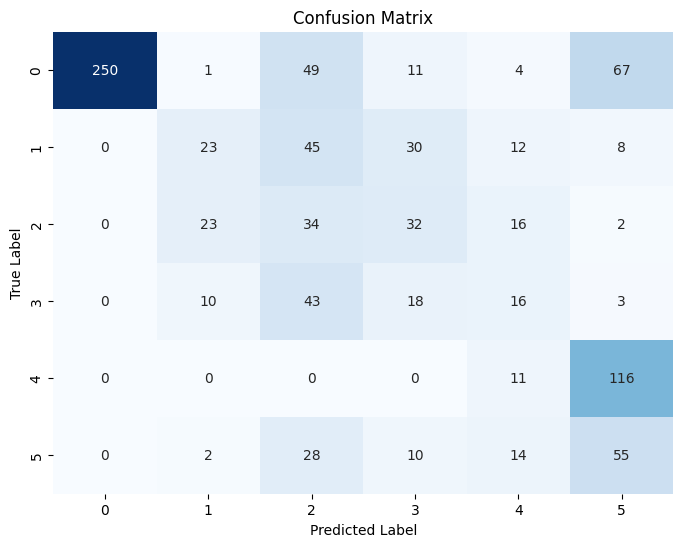

In [27]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have true labels (y_actual) and predicted labels (y_pred)
# For each class (0, 1, 2, 3), calculate precision, recall, and F1 score
precision = precision_score(y_val, y_pred, average=None)
recall = recall_score(y_val, y_pred, average=None)
f1 = f1_score(y_val, y_pred, average=None)

# Print results for each class
for class_label in range(6):
    print(f"Class {class_label}:")
    print(f"Precision: {precision[class_label]:.4f}")
    print(f"Recall: {recall[class_label]:.4f}")
    print(f"F1 Score: {f1[class_label]:.4f}\n")


Class 0:
Precision: 1.0000
Recall: 0.6545
F1 Score: 0.7911

Class 1:
Precision: 0.3898
Recall: 0.1949
F1 Score: 0.2599

Class 2:
Precision: 0.1709
Recall: 0.3178
F1 Score: 0.2222

Class 3:
Precision: 0.1782
Recall: 0.2000
F1 Score: 0.1885

Class 4:
Precision: 0.1507
Recall: 0.0866
F1 Score: 0.1100

Class 5:
Precision: 0.2191
Recall: 0.5046
F1 Score: 0.3056



# Label Mapping


In [12]:
def predictionMapping(prediction):
	if prediction == 0 or prediction == 4:
		return 0
	elif prediction == 5:
		return 1
	else:
		return 2

# Night Time


In [13]:
for i in range (len(y_pred)):
	y_pred[i] = predictionMapping(y_pred[i])

y_val = y_val.apply(predictionMapping)

In [14]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_pred, y_val)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.6195069667738478


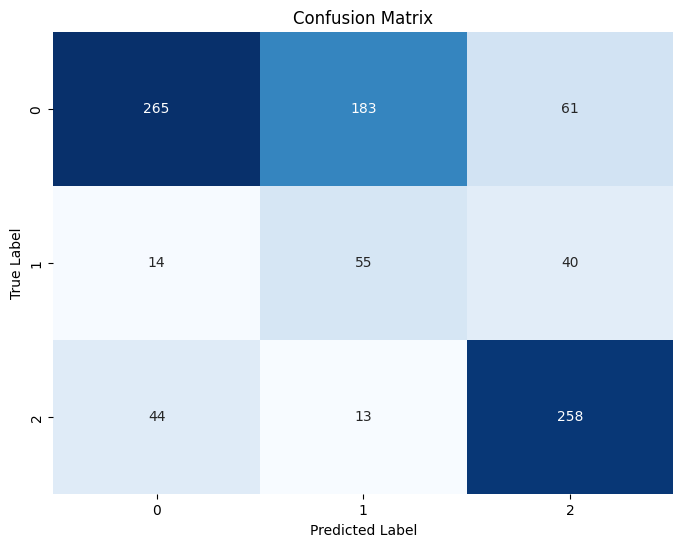

In [15]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [16]:
from sklearn.metrics import f1_score

f1 = f1_score(y_val, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.6417


In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have true labels (y_actual) and predicted labels (y_pred)
# For each class (0, 1, 2, 3), calculate precision, recall, and F1 score
precision = precision_score(y_val, y_pred, average=None)
recall = recall_score(y_val, y_pred, average=None)
f1 = f1_score(y_val, y_pred, average=None)

# Print results for each class
for class_label in range(3):
    print(f"Class {class_label}:")
    print(f"Precision: {precision[class_label]:.4f}")
    print(f"Recall: {recall[class_label]:.4f}")
    print(f"F1 Score: {f1[class_label]:.4f}\n")


Class 0:
Precision: 0.8204
Recall: 0.5206
F1 Score: 0.6370

Class 1:
Precision: 0.2191
Recall: 0.5046
F1 Score: 0.3056

Class 2:
Precision: 0.7187
Recall: 0.8190
F1 Score: 0.7656



# Run only upper part until label mapping


In [28]:
night_y_val = []
night_y_pred = []

for i in range (len(y_pred)):
	if y_val.iloc[i] != 5:
		night_y_val.append(predictionMapping(y_val.iloc[i]))
		if y_pred[i] == 5:
			night_y_pred.append(predictionMapping(0))
		else:
			night_y_pred.append(predictionMapping(y_pred[i]))





In [29]:
from sklearn import metrics

accuracy = metrics.accuracy_score(night_y_pred, night_y_val)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.8567961165048543


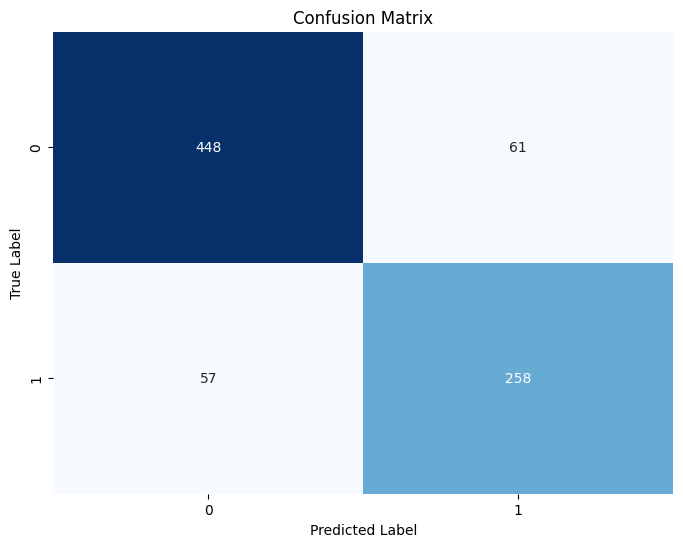

In [30]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(night_y_val, night_y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have true labels (y_actual) and predicted labels (y_pred)
# For each class (0, 1, 2, 3), calculate precision, recall, and F1 score
precision = precision_score(night_y_val, night_y_pred, average=None)
recall = recall_score(night_y_val, night_y_pred, average=None)
f1 = f1_score(night_y_val, night_y_pred, average=None)

# Print results for each class
for class_label in range(2):
    print(f"Class {class_label}:")
    print(f"Precision: {precision[class_label]:.4f}")
    print(f"Recall: {recall[class_label]:.4f}")
    print(f"F1 Score: {f1[class_label]:.4f}\n")


Class 0:
Precision: 0.8871
Recall: 0.8802
F1 Score: 0.8836

Class 1:
Precision: 0.8088
Recall: 0.8190
F1 Score: 0.8139

